# Explore here

In [2]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()



True

In [3]:
# We obtain the client_id and client_secret values.
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")
redirect_uri = os.environ.get("REDIRECT_URI")

# WE ADD THE DATA NECESSARY TO CONNECT TO THE API, AND THE SCOPE TO READ THE INFORMATION.
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope='user-library-read'))

In [4]:
# WE SPECIFY THE ARTIST WE WANT TO ANALYSE.
artist_id = "6KImCVD70vtIoJWnq6nGn3"

top_tracks = sp.artist_top_tracks(artist_id)['tracks']

# Print the top ten tracks with their name, duration in minutes and popularity.
for idx, track in enumerate(top_tracks, start=1):
    duration_minutes = track['duration_ms'] / 60000
    print(f"{idx}: {track['name']} (Duration: {duration_minutes:.2f} minutes. Popularity: {track['popularity']})")

1: As It Was (Duration: 2.79 minutes. Popularity: 91)
2: Watermelon Sugar (Duration: 2.90 minutes. Popularity: 87)
3: Adore You (Duration: 3.45 minutes. Popularity: 83)
4: Sign of the Times (Duration: 5.68 minutes. Popularity: 82)
5: Falling (Duration: 4.00 minutes. Popularity: 79)
6: Late Night Talking (Duration: 2.97 minutes. Popularity: 79)
7: Fine Line (Duration: 6.30 minutes. Popularity: 76)
8: Matilda (Duration: 4.10 minutes. Popularity: 76)
9: Keep Driving (Duration: 2.34 minutes. Popularity: 75)
10: Golden (Duration: 3.48 minutes. Popularity: 74)


In [5]:
# We create the DataFrame for the top tracks 
tracks_df = pd.DataFrame([{"Name": track['name'], "Duration (minutes)": track['duration_ms'] / 60000, "Popularity": track['popularity']} for track in top_tracks])

# Display the DataFrame
print(tracks_df.head(3))


               Name  Duration (minutes)  Popularity
0         As It Was            2.788383          91
1  Watermelon Sugar            2.900000          87
2         Adore You            3.452217          83


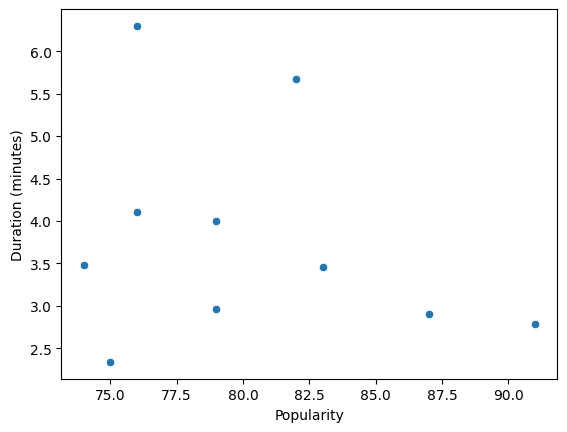

In [6]:
# We analyse if there is a statistical relationship between popularity and duration of the song.
scatter_plot = sns.scatterplot(data=tracks_df, x="Popularity", y="Duration (minutes)")
plt.show()


The dots on the graph are not following a linear trend, therefore, there is no relationship between a song's length and its popularity.